In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras import layers

In [8]:
X_data = pd.read_csv('Corona_NLP_train.csv', index_col=0)
X_data

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
UserName,,,,,
3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...
44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
44953,89905,NaN,14-04-2020,You know its getting tough when @KameronWilds...,Positive


In [9]:
Y_data = pd.read_csv('Corona_NLP_test.csv', index_col=0)
Y_data

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
UserName,,,,,
1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...
3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral


In [10]:
print(X_data.shape, Y_data.shape)

(41157, 5) (3798, 5)


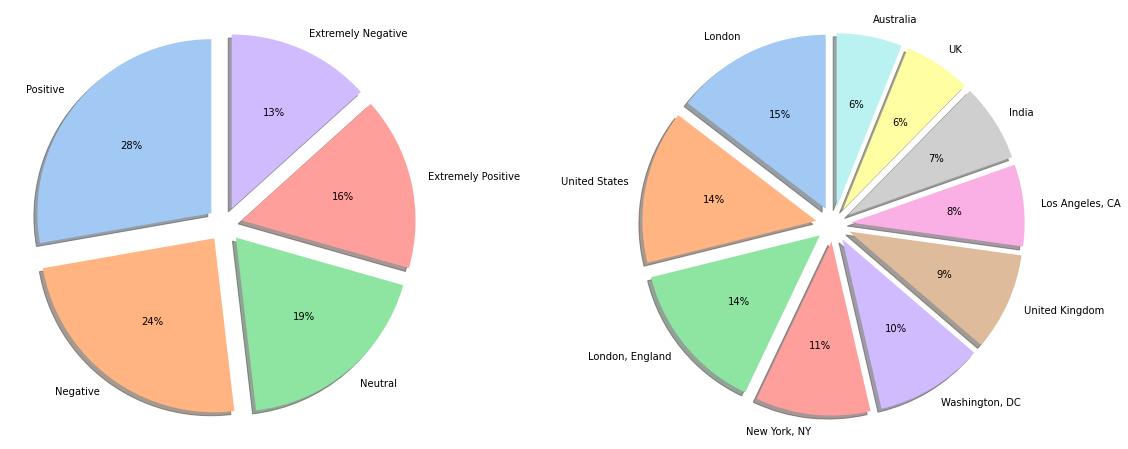

In [11]:
def plot_pie(df, column, axes, amount=-1):
    """ PIE PLOT """
    count_classes = df[column].value_counts()
    if (amount != -1):
        count_classes = count_classes[:amount]
    n_classes = len(count_classes)
    explode = (0.1,) * n_classes # explode for 0.1 each slice
    colors = sns.color_palette('pastel') # pastel colors
    axes.pie(count_classes, 
             labels=count_classes.index, 
             explode=explode,
             colors=colors,
             autopct='%.0f%%',
             shadow=True, 
             startangle=90)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
plot_pie(X_data, "Sentiment", axes[0])
plot_pie(X_data, "Location", axes[1], 10) # only first 10 locations
plt.show()

In [12]:
y = X_data["Sentiment"].map({"Negative":0,
                             "Positive": 1,
                             "Neutral": 2,
                             "Extremely Positive": 3,
                             "Extremely Negative": 4})

y_test = Y_data["Sentiment"].map({"Negative":0,
                                  "Positive": 1,
                                  "Neutral": 2,
                                  "Extremely Positive": 3,
                                  "Extremely Negative": 4})

In [14]:
# get the number of classes
n_classes = X_data["Sentiment"].nunique()
n_classes

5

In [32]:
# extract text data from dataframe 
X = X_data['OriginalTweet'].to_numpy()
X_test = Y_data['OriginalTweet'].to_numpy()

In [33]:
# TextVectorization transforms a batch of strings into either a list of token indices or a dense representation
text_vectorizer = TextVectorization(max_tokens=10000, 
                                    standardize="lower_and_strip_punctuation", 
                                    output_sequence_length=15)

In [34]:
# adapt dataset
text_vectorizer.adapt(X)

In [35]:
# example
text_vectorizer(["Computer vision and deep learning"])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[4031, 8344,    4, 1661, 2049,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [36]:
# the get_vocabulary() function provides 
# the vocabulary to build a metadata file 
# with one token per line
words = text_vectorizer.get_vocabulary()
# The vocabulary contains the padding 
# token ('') and OOV token ('[UNK]') 
# as well as the passed tokens
words # check data

['',
 '[UNK]',
 'the',
 'to',
 'and',
 'of',
 'a',
 'in',
 'coronavirus',
 'covid19',
 'for',
 'is',
 'are',
 'on',
 'you',
 'i',
 'this',
 'prices',
 'at',
 'food',
 'supermarket',
 'store',
 'with',
 'that',
 'grocery',
 'we',
 'have',
 'as',
 'be',
 'it',
 'people',
 'from',
 'amp',
 'all',
 'your',
 'not',
 'will',
 'consumer',
 'my',
 'our',
 'has',
 'they',
 'out',
 'up',
 'can',
 'by',
 '19',
 'more',
 'or',
 'shopping',
 'but',
 'if',
 'online',
 'how',
 'covid',
 'their',
 'during',
 'pandemic',
 'so',
 'now',
 'no',
 'get',
 'about',
 'need',
 'who',
 'what',
 'us',
 'just',
 'workers',
 'panic',
 'do',
 'like',
 'sanitizer',
 'was',
 'an',
 'when',
 'time',
 'demand',
 'go',
 'home',
 'some',
 'help',
 'there',
 'hand',
 'its',
 'stock',
 'going',
 'me',
 'one',
 's',
 'due',
 'been',
 'oil',
 'new',
 'buying',
 'covid2019',
 'please',
 'crisis',
 'toiletpaper',
 'here',
 'work',
 'them',
 'after',
 'other',
 'because',
 'toilet',
 'these',
 'retail',
 'only',
 'than',
 'sho

In [37]:
# turns positive integers (indexes) 
# into dense vectors of fixed size
embedding = Embedding(input_dim=10000, 
                      output_dim=128, 
                      input_length=15, 
                      name = 'embeding_1')
embedding

In [61]:
X = text_vectorizer(X)
X

<tf.Tensor: shape=(41157, 15), dtype=int64, numpy=
array([[   1,    1,    1, ...,    0,    0,    0],
       [ 515,  907,    3, ...,  398,   22,  901],
       [   8,  831, 1824, ...,  136,    1,    0],
       ...,
       [  14,  131,  206, ...,   98, 1396,    1],
       [  11,   29,  736, ..., 1103,   87,   13],
       [   1,  196,    1, ..., 2177,    2,  409]])>

In [64]:
X_test = text_vectorizer(X_test)
X_test

<tf.Tensor: shape=(3798, 15), dtype=int64, numpy=
array([[2217,   93, 5653, ...,   52, 2025,    1],
       [  75,   15, 1999, ...,  287,   50,    1],
       [ 207,   42,   53, ...,    0,    0,    0],
       ...,
       [   1, 5076,    5, ...,  715,   13,    8],
       [ 991,   63,    3, ..., 9623,   48,  146],
       [  15,    4,    1, ...,    4,   39,    1]])>

In [67]:
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32 # 가중치 개수

model1 = Sequential()
model1.add(Embedding(10000, embedding_dim))
model1.add(SimpleRNN(hidden_units))
model1.add(Dense(n_classes, activation='softmax'))

model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history1 = model1.fit(X, y, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1287/1287 [==============================] - 12s 8ms/step - loss: 1.4315 - acc: 0.3624 - val_loss: 1.3775 - val_acc: 0.4021
Epoch 2/10
1287/1287 [==============================] - 10s 8ms/step - loss: 1.1988 - acc: 0.5078 - val_loss: 1.3430 - val_acc: 0.4179
Epoch 3/10
1287/1287 [==============================] - 10s 8ms/step - loss: 1.0662 - acc: 0.5834 - val_loss: 1.4413 - val_acc: 0.4121
Epoch 4/10
1287/1287 [==============================] - 10s 8ms/step - loss: 0.9471 - acc: 0.6436 - val_loss: 1.4606 - val_acc: 0.3918
Epoch 5/10
1287/1287 [==============================] - 10s 7ms/step - loss: 0.8387 - acc: 0.6945 - val_loss: 1.5574 - val_acc: 0.4005
Epoch 6/10
1287/1287 [==============================] - 11s 9ms/step - loss: 0.7461 - acc: 0.7332 - val_loss: 1.6581 - val_acc: 0.3973
Epoch 7/10
1287/1287 [==============================] - 12s 9ms/step - loss: 0.6663 - acc: 0.7673 - val_loss: 1.7439 - val_acc: 0.3952
Epoch 8/10
1287/1287 [==============================] -

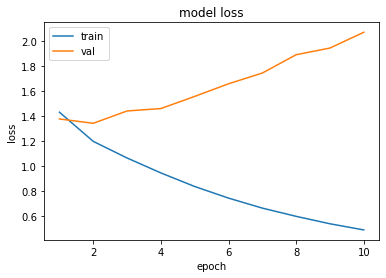

In [68]:
epochs = range(1, len(history1.history['acc']) + 1)
plt.plot(epochs, history1.history['loss'])
plt.plot(epochs, history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

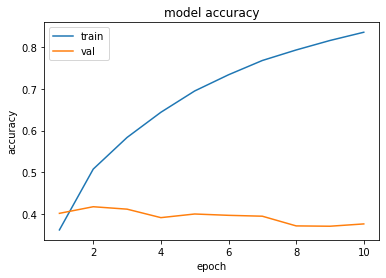

In [73]:
epochs = range(1, len(history1.history['acc']) + 1)
plt.plot(epochs, history1.history['acc'])
plt.plot(epochs, history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [71]:
history1.history

{'loss': [1.4314767122268677,
  1.1988394260406494,
  1.06620192527771,
  0.9470643401145935,
  0.838679850101471,
  0.7461389303207397,
  0.6662742495536804,
  0.6007260680198669,
  0.5413256287574768,
  0.4923759996891022],
 'acc': [0.36244139075279236,
  0.5077872276306152,
  0.5834001302719116,
  0.6435843110084534,
  0.6945112347602844,
  0.7331923842430115,
  0.7673299908638,
  0.7924776077270508,
  0.8151468634605408,
  0.8348519206047058],
 'val_loss': [1.3775211572647095,
  1.3430254459381104,
  1.441290259361267,
  1.4606021642684937,
  1.5574216842651367,
  1.658113718032837,
  1.743893027305603,
  1.8900172710418701,
  1.9432549476623535,
  2.06931471824646],
 'val_acc': [0.40205371379852295,
  0.4178515076637268,
  0.4120589792728424,
  0.3917851448059082,
  0.4004739224910736,
  0.3973143696784973,
  0.3952080011367798,
  0.3720379173755646,
  0.3712480366230011,
  0.3767772614955902]}

In [75]:
model2 = Sequential()
model2.add(Embedding(10000, embedding_dim))
model2.add(GRU(hidden_units))
model2.add(Dense(n_classes, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history2 = model2.fit(X, y, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1287/1287 [==============================] - 27s 19ms/step - loss: 1.4395 - acc: 0.3577 - val_loss: 1.3744 - val_acc: 0.4057
Epoch 2/10
1287/1287 [==============================] - 20s 16ms/step - loss: 1.2084 - acc: 0.4984 - val_loss: 1.3022 - val_acc: 0.4447
Epoch 3/10
1287/1287 [==============================] - 19s 15ms/step - loss: 1.1134 - acc: 0.5501 - val_loss: 1.2715 - val_acc: 0.4716
Epoch 4/10
1287/1287 [==============================] - 20s 15ms/step - loss: 1.0570 - acc: 0.5793 - val_loss: 1.2507 - val_acc: 0.4689
Epoch 5/10
1287/1287 [==============================] - 19s 15ms/step - loss: 1.0147 - acc: 0.6016 - val_loss: 1.2496 - val_acc: 0.4742
Epoch 6/10
1287/1287 [==============================] - 18s 14ms/step - loss: 0.9768 - acc: 0.6229 - val_loss: 1.2674 - val_acc: 0.4763
Epoch 7/10
1287/1287 [==============================] - 18s 14ms/step - loss: 0.9425 - acc: 0.6411 - val_loss: 1.2801 - val_acc: 0.4681
Epoch 8/10
1287/1287 [==========================

In [79]:
def plot_acc(hist):
    epochs = range(1, len(hist.history['acc']) + 1)
    plt.plot(epochs, hist.history['acc'])
    plt.plot(epochs, hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def plot_loss(hist):
    epochs = range(1, len(hist.history['acc']) + 1)
    plt.plot(epochs, hist.history['loss'])
    plt.plot(epochs, hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [77]:
model3 = Sequential()
model3.add(Embedding(10000, embedding_dim))
model3.add(LSTM(hidden_units))
model3.add(Dense(n_classes, activation='softmax'))

model3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history3 = model3.fit(X, y, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1287/1287 [==============================] - 23s 15ms/step - loss: 1.3876 - acc: 0.3915 - val_loss: 1.3395 - val_acc: 0.4184
Epoch 2/10
1287/1287 [==============================] - 16s 13ms/step - loss: 1.1772 - acc: 0.5117 - val_loss: 1.2872 - val_acc: 0.4500
Epoch 3/10
1287/1287 [==============================] - 18s 14ms/step - loss: 1.0988 - acc: 0.5548 - val_loss: 1.2526 - val_acc: 0.4595
Epoch 4/10
1287/1287 [==============================] - 18s 14ms/step - loss: 1.0489 - acc: 0.5810 - val_loss: 1.2540 - val_acc: 0.4831
Epoch 5/10
1287/1287 [==============================] - 17s 13ms/step - loss: 1.0119 - acc: 0.6029 - val_loss: 1.2623 - val_acc: 0.4718
Epoch 6/10
1287/1287 [==============================] - 18s 14ms/step - loss: 0.9772 - acc: 0.6188 - val_loss: 1.2582 - val_acc: 0.4618
Epoch 7/10
1287/1287 [==============================] - 16s 13ms/step - loss: 0.9455 - acc: 0.6332 - val_loss: 1.2563 - val_acc: 0.4729
Epoch 8/10
1287/1287 [==========================

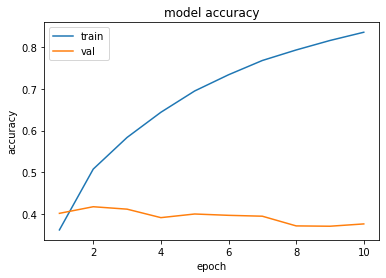

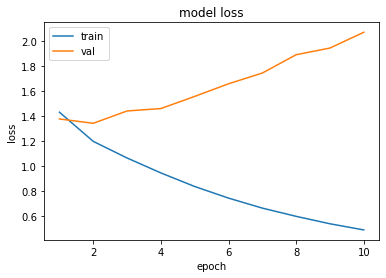

In [103]:
plot_acc(history1)
plot_loss(history1)

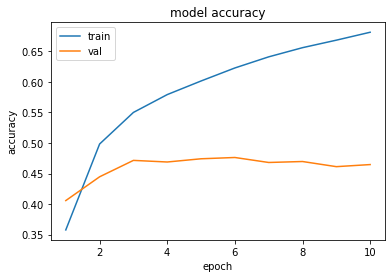

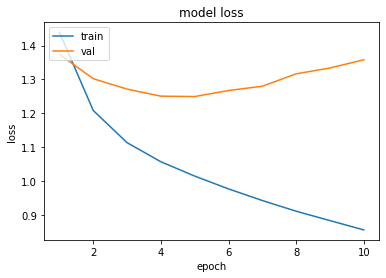

In [80]:
plot_acc(history2)
plot_loss(history2)

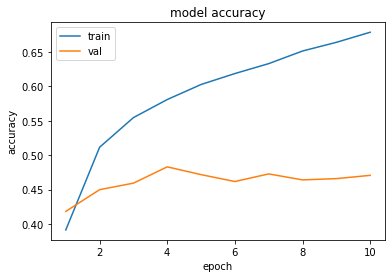

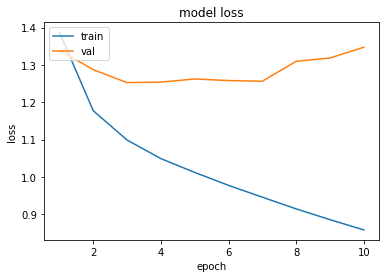

In [81]:
plot_acc(history3)
plot_loss(history3)

In [89]:
minloss1 = min(history1.history['loss'])
minloss2 = min(history2.history['loss'])
minloss3 = min(history3.history['loss'])

In [90]:
maxacc1 = max(history1.history['acc'])
maxacc2 = max(history2.history['acc'])
maxacc3 = max(history3.history['acc'])

In [91]:
mintestloss1 = min(history1.history['val_loss'])
mintestloss2 = min(history2.history['val_loss'])
mintestloss3 = min(history3.history['val_loss'])

In [92]:
maxtestacc1 = max(history1.history['val_acc'])
maxtestacc2 = max(history2.history['val_acc'])
maxtestacc3 = max(history3.history['val_acc'])

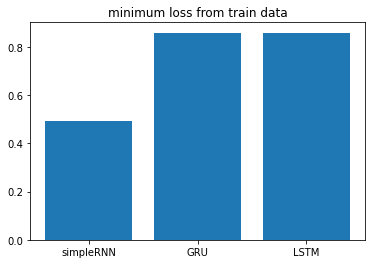

In [99]:
plt.bar(x=['simpleRNN', 'GRU', 'LSTM'], height=[minloss1, minloss2, minloss3])
plt.title('minimum loss from train data')
plt.show()

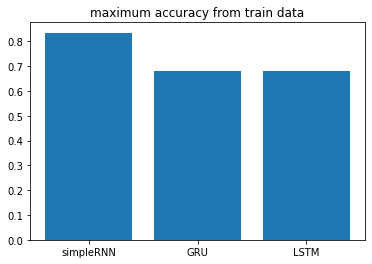

In [100]:
plt.bar(x=['simpleRNN', 'GRU', 'LSTM'], height=[maxacc1, maxacc2, maxacc3])
plt.title('maximum accuracy from train data')
plt.show()

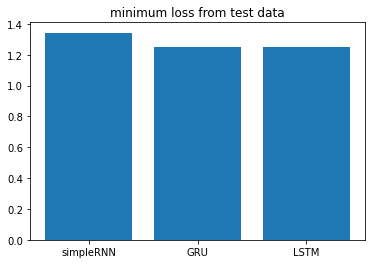

In [101]:
plt.bar(x=['simpleRNN', 'GRU', 'LSTM'], height=[mintestloss1, mintestloss2, mintestloss3])
plt.title('minimum loss from test data')
plt.show()

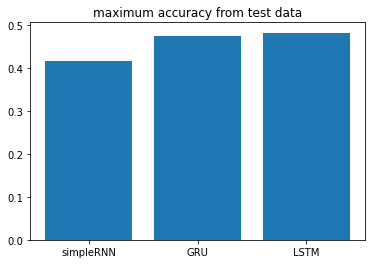

In [102]:
plt.bar(x=['simpleRNN', 'GRU', 'LSTM'], height=[maxtestacc1, maxtestacc2, maxtestacc3])
plt.title('maximum accuracy from test data')
plt.show()

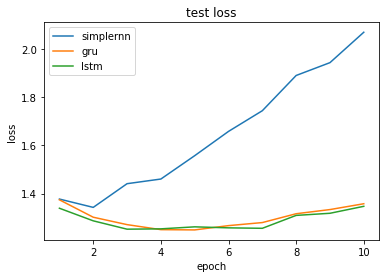

In [109]:
epochs = range(1, len(history1.history['acc']) + 1)

plt.plot(epochs, history1.history['val_loss'])
plt.plot(epochs, history2.history['val_loss'])
plt.plot(epochs, history3.history['val_loss'])

plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['simplernn', 'gru', 'lstm'], loc='upper left')
plt.show()

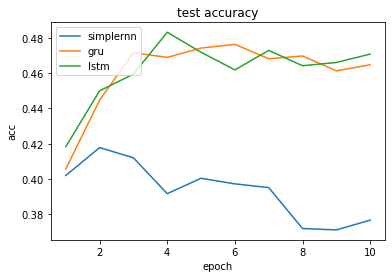

In [110]:
epochs = range(1, len(history1.history['acc']) + 1)

plt.plot(epochs, history1.history['val_acc'])
plt.plot(epochs, history2.history['val_acc'])
plt.plot(epochs, history3.history['val_acc'])

plt.title('test accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['simplernn', 'gru', 'lstm'], loc='upper left')
plt.show()